In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx

from pyonalib.network_smoothing.random_walk import *
from pyonalib.network_smoothing.recombination import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')
sns.set_context('poster')

## Construct toy network

In [2]:
adj_matrix = np.matrix([
        [0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [1, 1, 0, 0, 0]])
adj_matrix

matrix([[0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [1, 1, 0, 0, 0]])

(-0.10500000000000001, 1.105, -0.069593068447833556, 0.73238419652243891)

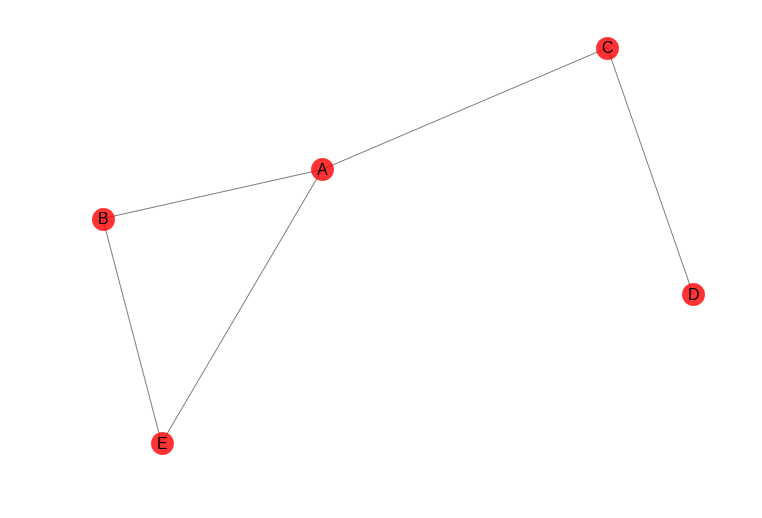

In [3]:
G = nx.Graph(adj_matrix)
pos=nx.spring_layout(G) # positions for all nodes

NODE_NAMES = { i: l for i,l in enumerate('ABCDE') }

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=G.nodes(),
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(G, pos, NODE_NAMES, font_size=16)

plt.axis('off')

In [4]:
expr_matrix = pd.DataFrame([[1,0,0,0,0]], columns = ["gene {}".format(i) for i in "ABCDE"],
                          index=["sample {}".format(i) for i in range(1)])
expr_matrix

,gene A,gene B,gene C,gene D,gene E
sample 0,1,0,0,0,0


In [5]:
smooth_by_iterations(expr_matrix, adj_matrix, 0.5)

Converged in 25 iterations


/home/jona/.virtualenvs/p360/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


,gene A,gene B,gene C,gene D,gene E
sample 0,0.59434,0.132075,0.113208,0.028302,0.132075


In [6]:
smooth_by_mtx_inv(expr_matrix, adj_matrix, 0.5)

/home/jona/.virtualenvs/p360/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


,gene A,gene B,gene C,gene D,gene E
sample 0,0.59434,0.132075,0.113208,0.028302,0.132075


In [7]:
smooth_by_linalg_solve(expr_matrix, adj_matrix, 0.5)

/home/jona/.virtualenvs/p360/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


,gene A,gene B,gene C,gene D,gene E
sample 0,0.59434,0.132075,0.113208,0.028302,0.132075


## With different feature space on smoothing network and expression data

In [8]:
A_genes = ['gene {}'.format(e) for e in 'ABCXY']

(-0.10500000000000001, 1.105, -0.095881517173967881, 1.0090388235927095)

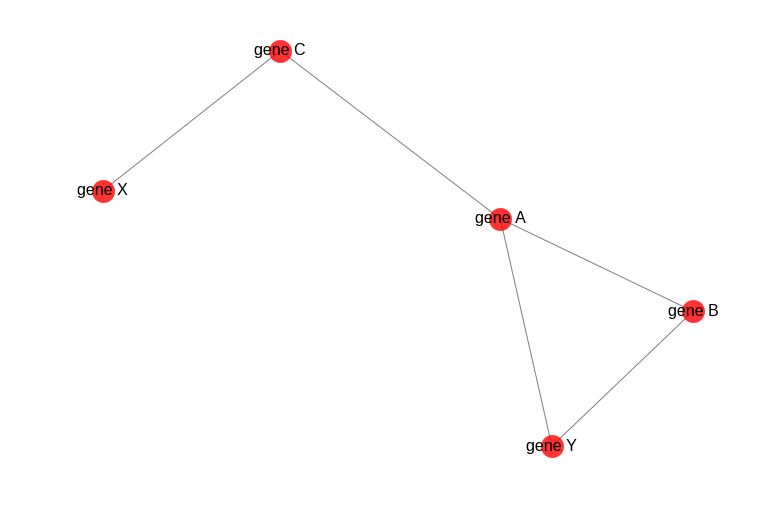

In [9]:
G = nx.Graph(adj_matrix)
pos=nx.spring_layout(G) # positions for all nodes

NODE_NAMES = { i: l for i,l in enumerate(A_genes) }

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=G.nodes(),
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(G, pos, NODE_NAMES, font_size=16)

plt.axis('off')

In [10]:
from functools import partial

In [11]:
smooth_func = partial(smooth_by_iterations, adj_matrix=adj_matrix, alpha=.5)

In [12]:
smooth_and_recombine(expr_matrix, smooth_func, A_genes)

Converged in 25 iterations


/home/jona/.virtualenvs/p360/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


,gene A,gene B,gene C,gene D,gene E
sample 0,0.59434,0.132075,0.113208,0.0,0.0


## Automatic inference of feature axis

In [13]:
expr_matrix = pd.DataFrame([[1,0,0,0,0]], columns = ["gene {}".format(i) for i in "ABCDE"],
                          index=["sample {}".format(i) for i in range(1)]).T
expr_matrix

,sample 0
gene A,1
gene B,0
gene C,0
gene D,0
gene E,0


In [14]:
smooth_and_recombine(expr_matrix, smooth_func, A_genes)

Converged in 25 iterations


/home/jona/.virtualenvs/p360/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


,sample 0
gene A,0.594340
gene B,0.132075
gene C,0.113208
gene D,0.000000
gene E,0.000000


## Negative edges (inhibition)

In [50]:
adj_matrix = np.matrix([
        [0, 1, -1, 0, 1],
        [1, 0, 0, 0, 1],
        [-1, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [1, 1, 0, 0, 0]])
adj_matrix

matrix([[ 0,  1, -1,  0,  1],
        [ 1,  0,  0,  0,  1],
        [-1,  0,  0,  1,  0],
        [ 0,  0,  1,  0,  0],
        [ 1,  1,  0,  0,  0]])

{'weight': 1}

(-0.10500000000000001, 1.105, -0.064752827166360299, 0.68144641922693461)

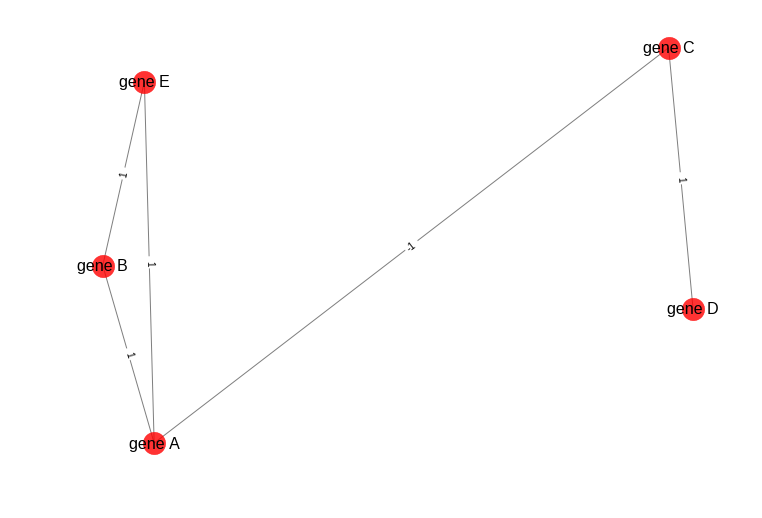

In [60]:
G = nx.from_numpy_matrix(adj_matrix)
    
pos=nx.spring_layout(G) # positions for all nodes
A_genes = ["gene {}".format(e) for e in 'ABCDE']
NODE_NAMES = { i: l for i,l in enumerate(A_genes) }

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=G.nodes(),
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(G, pos, NODE_NAMES, font_size=16)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.axis('off')

In [85]:
expr_matrix = pd.DataFrame([[1,1,0,1,1]], columns = ["gene {}".format(i) for i in "ABCDE"],
                          index=["sample {}".format(i) for i in range(1)])
expr_matrix

,gene A,gene B,gene C,gene D,gene E
sample 0,1,1,0,1,1


In [86]:
smooth_by_iterations(expr_matrix, adj_matrix, 0.5)

Converged in 25 iterations


/home/jona/.virtualenvs/p360/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


,gene A,gene B,gene C,gene D,gene E
sample 0,0.90566,0.867925,0.113208,0.528302,0.867925
